In [6]:
import random
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output

class VacuumAgent:
    def __init__(self, rows=10, cols=10, delay=0.5):
        self.rows = rows
        self.cols = cols
        self.delay = delay
        self.environment = [[random.randint(0, 1) for _ in range(cols)] for _ in range(rows)]
        self.current_pos = [random.randint(0, rows - 1), random.randint(0, cols - 1)]
        self.steps = 0
        self.done = False

    def action(self):
        if self.environment[self.current_pos[0]][self.current_pos[1]] == 1:
            self.environment[self.current_pos[0]][self.current_pos[1]] = 0
            return True
        return False

    def move(self):
        if self.current_pos[1] < self.cols - 1:
            self.current_pos[1] += 1
        elif self.current_pos[0] < self.rows - 1:
            self.current_pos[0] += 1
            self.current_pos[1] = 0
        else:
            # Reached last cell
            self.current_pos = [0, 0]

    def is_done(self):
        return all(cell == 0 for row in self.environment for cell in row)

    def visualize(self):
        plt.figure(figsize=(6, 6))
        ax = plt.gca()
        ax.set_xlim(0, self.cols)
        ax.set_ylim(0, self.rows)
        ax.set_xticks(range(self.cols + 1))
        ax.set_yticks(range(self.rows + 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True)

        for i in range(self.rows):
            for j in range(self.cols):
                color = 'lightgray' if self.environment[i][j] == 1 else 'white'
                rect = patches.Rectangle((j, self.rows - i - 1), 1, 1, edgecolor='black', facecolor=color)
                ax.add_patch(rect)

        ai, aj = self.current_pos
        agent_rect = patches.Rectangle((aj, self.rows - ai - 1), 1, 1, edgecolor='red', facecolor='red', alpha=0.6)
        ax.add_patch(agent_rect)

        ax.set_title(f"Step: {self.steps}")
        plt.show()

    def run(self):
        while not self.done:
            clear_output(wait=True)

            # Check before acting
            if self.is_done():
                self.done = True
                break

            if self.action():
                print(f"🧹 Cleaned: {self.current_pos}")
            else:
                print(f"✔️ Already clean: {self.current_pos}")

            self.visualize()
            self.move()
            self.steps += 1
            time.sleep(self.delay)

        # Final clean screen
        clear_output(wait=True)
        print(f"✅ Cleaning complete in {self.steps} steps!")
        self.visualize()

✔️ Already clean: [4, 5]


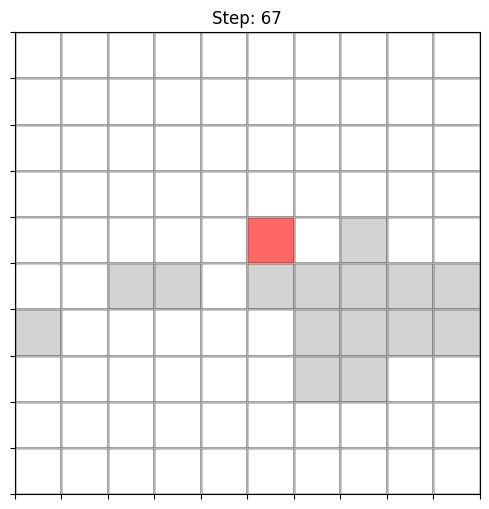

In [ ]:
agent = VacuumAgent(delay=0.4)
agent.run()